**MNIST Handwritten Digit Clasification Model**

Importing the Dependencies

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [78]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [79]:
type(X_train)

numpy.ndarray

In [80]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [81]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [82]:
print(X_train[10].shape)

(28, 28)


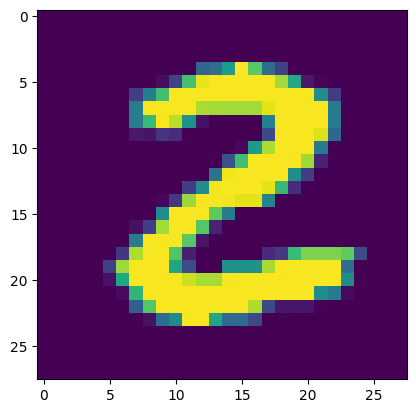

2


In [83]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image Lables

In [84]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [85]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


 we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [86]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [87]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [88]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [89]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3105 - accuracy: 0.9110
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1496 - accuracy: 0.9554
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1089 - accuracy: 0.9668
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0877 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0724 - accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0532 - accuracy: 0.9827
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0460 - accuracy: 0.9850
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0414 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

Training data accuracy = 99.5%

**Accuracy on Test data:**

In [91]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1002 - accuracy: 0.9745
0.9745000004768372


Test data accuracy = 97.1%

In [92]:
print(X_test.shape)

(10000, 28, 28)


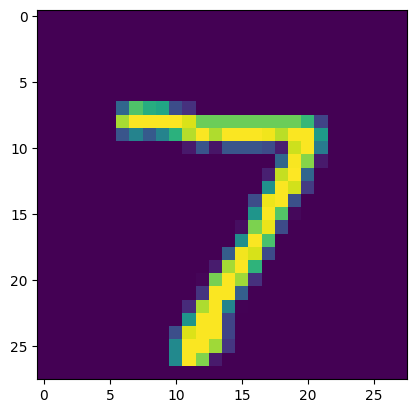

In [93]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [94]:
print(Y_test[0])

7


In [95]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [96]:
print(Y_pred.shape)

(10000, 10)


In [97]:
print(Y_pred[0])

[5.5918522e-04 3.4287453e-03 5.7367921e-01 9.4098258e-01 4.2948486e-08
 9.5619325e-04 4.1928708e-08 9.9999297e-01 3.2789830e-02 1.3039604e-01]


model.predict() gives the prediction probability of each class for that data point

In [98]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [99]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

test=True labels

pred_labels= Predicted Labels

Confusin Matrix

In [100]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [101]:
print(conf_mat)

tf.Tensor(
[[ 965    0    2    2    0    6    3    1    1    0]
 [   0 1127    3    0    0    0    2    0    3    0]
 [   4    5 1005    4    3    0    2    7    1    1]
 [   0    0    6  968    0   19    1    6    6    4]
 [   0    0    2    1  952    1    8    4    0   14]
 [   1    0    0    3    1  878    5    0    3    1]
 [   4    1    1    0    3    7  942    0    0    0]
 [   1    4    8    1    3    0    0 1001    1    9]
 [   0    1    3    4    7   15    1    4  934    5]
 [   4    2    1    4   10    8    0    3    4  973]], shape=(10, 10), dtype=int32)


Text(0.5, 25.722222222222214, 'Predicted label')

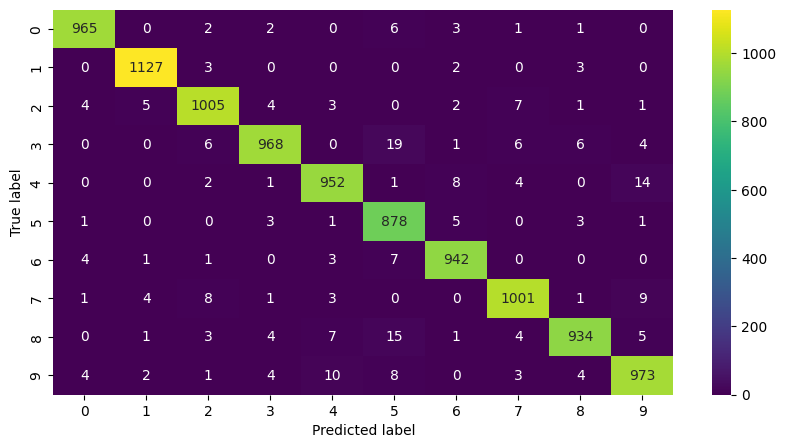

In [102]:
plt.figure(figsize=(10,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Building a Predictive System

In [103]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [104]:
type(input_image)

numpy.ndarray

In [105]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


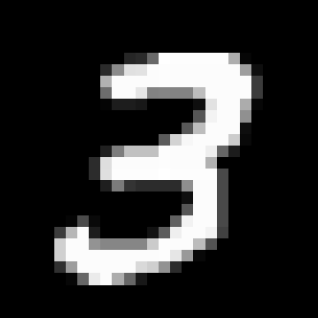

In [106]:
cv2_imshow(input_image)

In [107]:
input_image.shape

(318, 318, 3)

In [108]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [109]:
grayscale.shape

(318, 318)

In [110]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [111]:
input_image_resize.shape

(28, 28)

In [112]:
cv2_imshow(input_image_resize)

In [113]:
input_image_resize = input_image_resize/255

In [114]:
type(input_image_resize)

numpy.ndarray

In [115]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [116]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 18ms/step
[[1.5798600e-08 1.7676005e-02 1.3923715e-03 1.0000000e+00 2.1117921e-09
  5.6784600e-01 5.5850306e-13 3.3260462e-01 3.0634972e-01 9.9997908e-01]]


In [117]:
input_pred_label = np.argmax(input_prediction)

In [118]:
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted: /content/sample_image.png


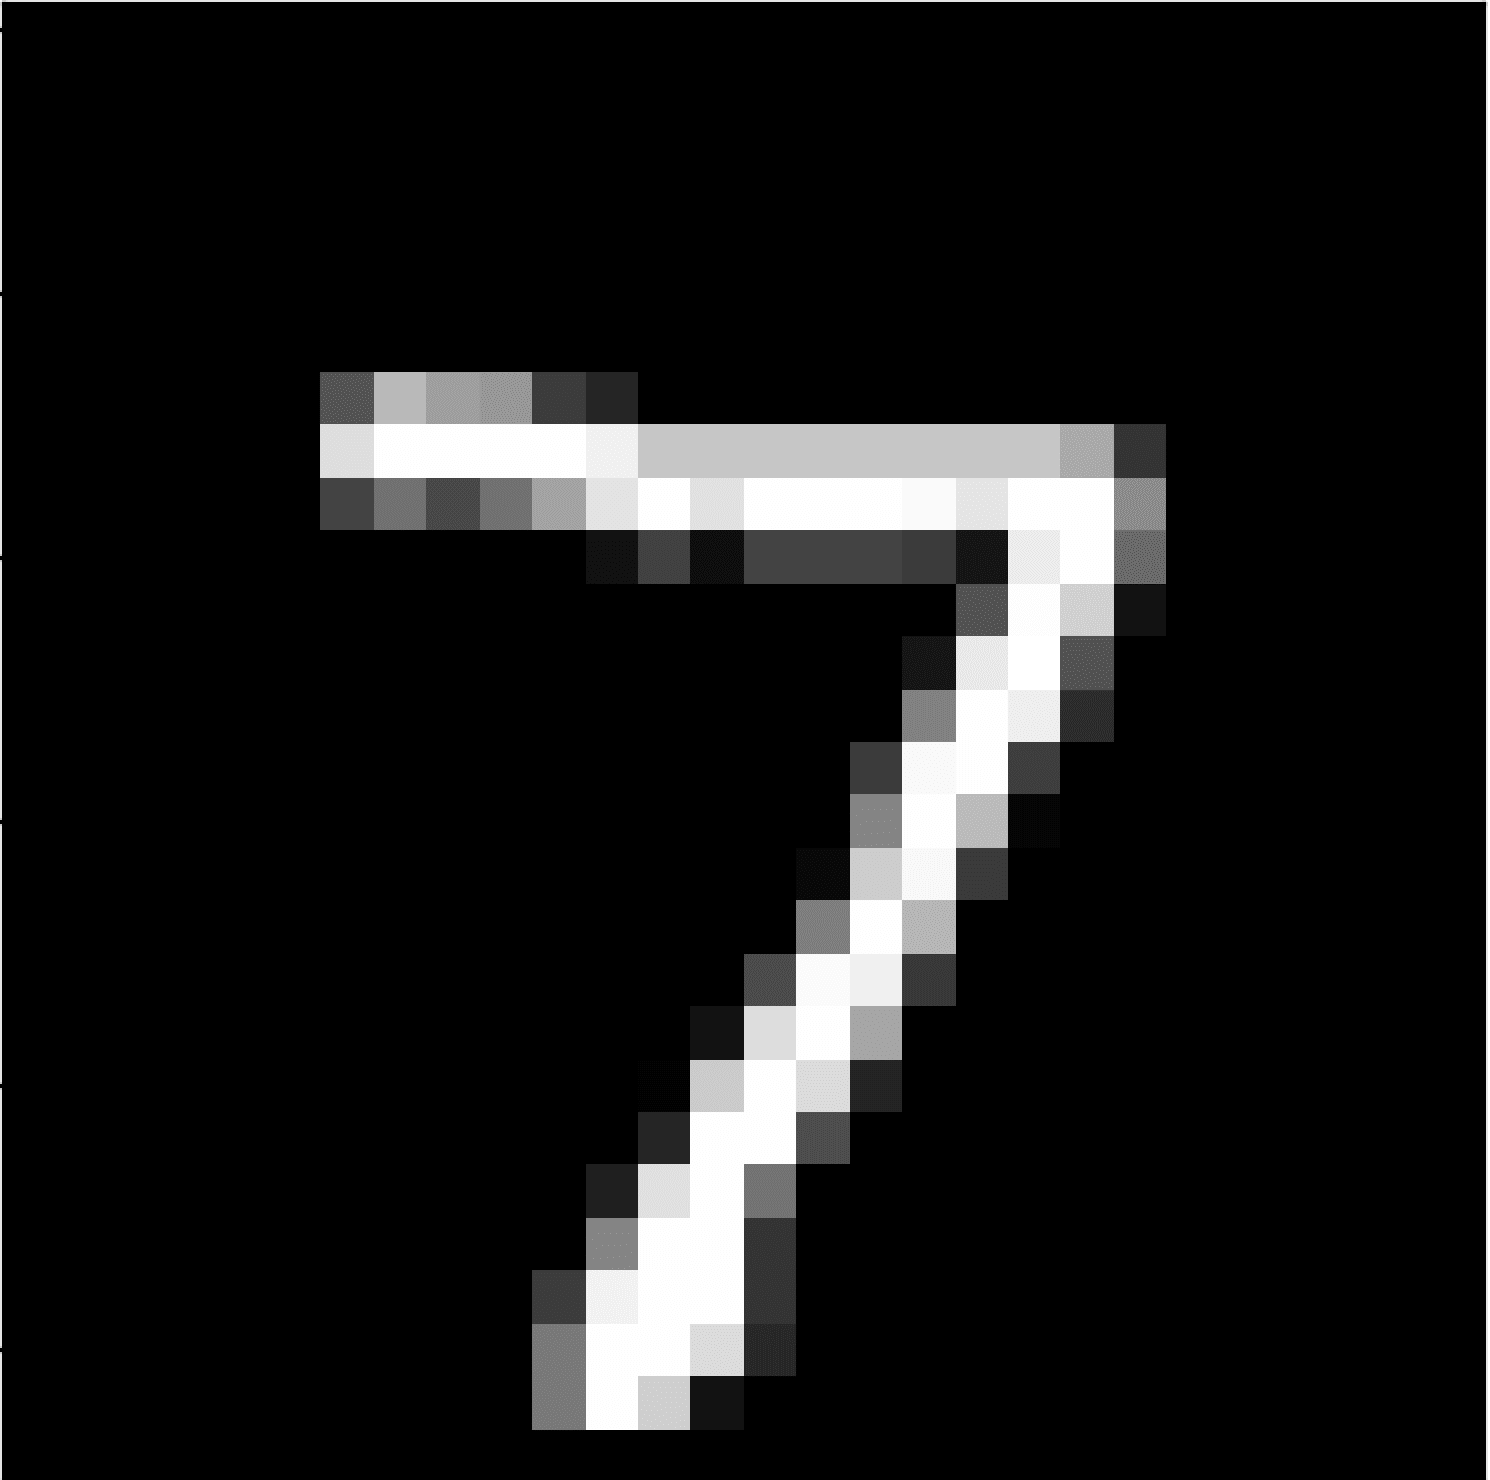

1/1 [==============================] - 0s 18ms/step
The Handwritten Digit is recognised as  7


In [119]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)